In [152]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets,transforms
import os
from model.classifier import Classifier
from model.norm_classifier import PowClassifier
from model.torch_rbf import *
import matplotlib.pyplot as plt
import numpy as np

In [153]:
log_dir = "./log/norm2_2022_12_23_15_28_35_594024/" 
file_dir = log_dir + "59/"

In [154]:
layer_widths = [28*28, 10]
layer_centres = [10]
basis_func = linear
model = RBFClassifier(layer_widths, layer_centres, basis_func)                                                 # 调用模型Model
model.load_state_dict(torch.load(file_dir+"model_parameter.pkl"))    # 加载模型参数     

<All keys matched successfully>

In [155]:
print(model.rbf_layers[0].centres.shape)

torch.Size([10, 784])


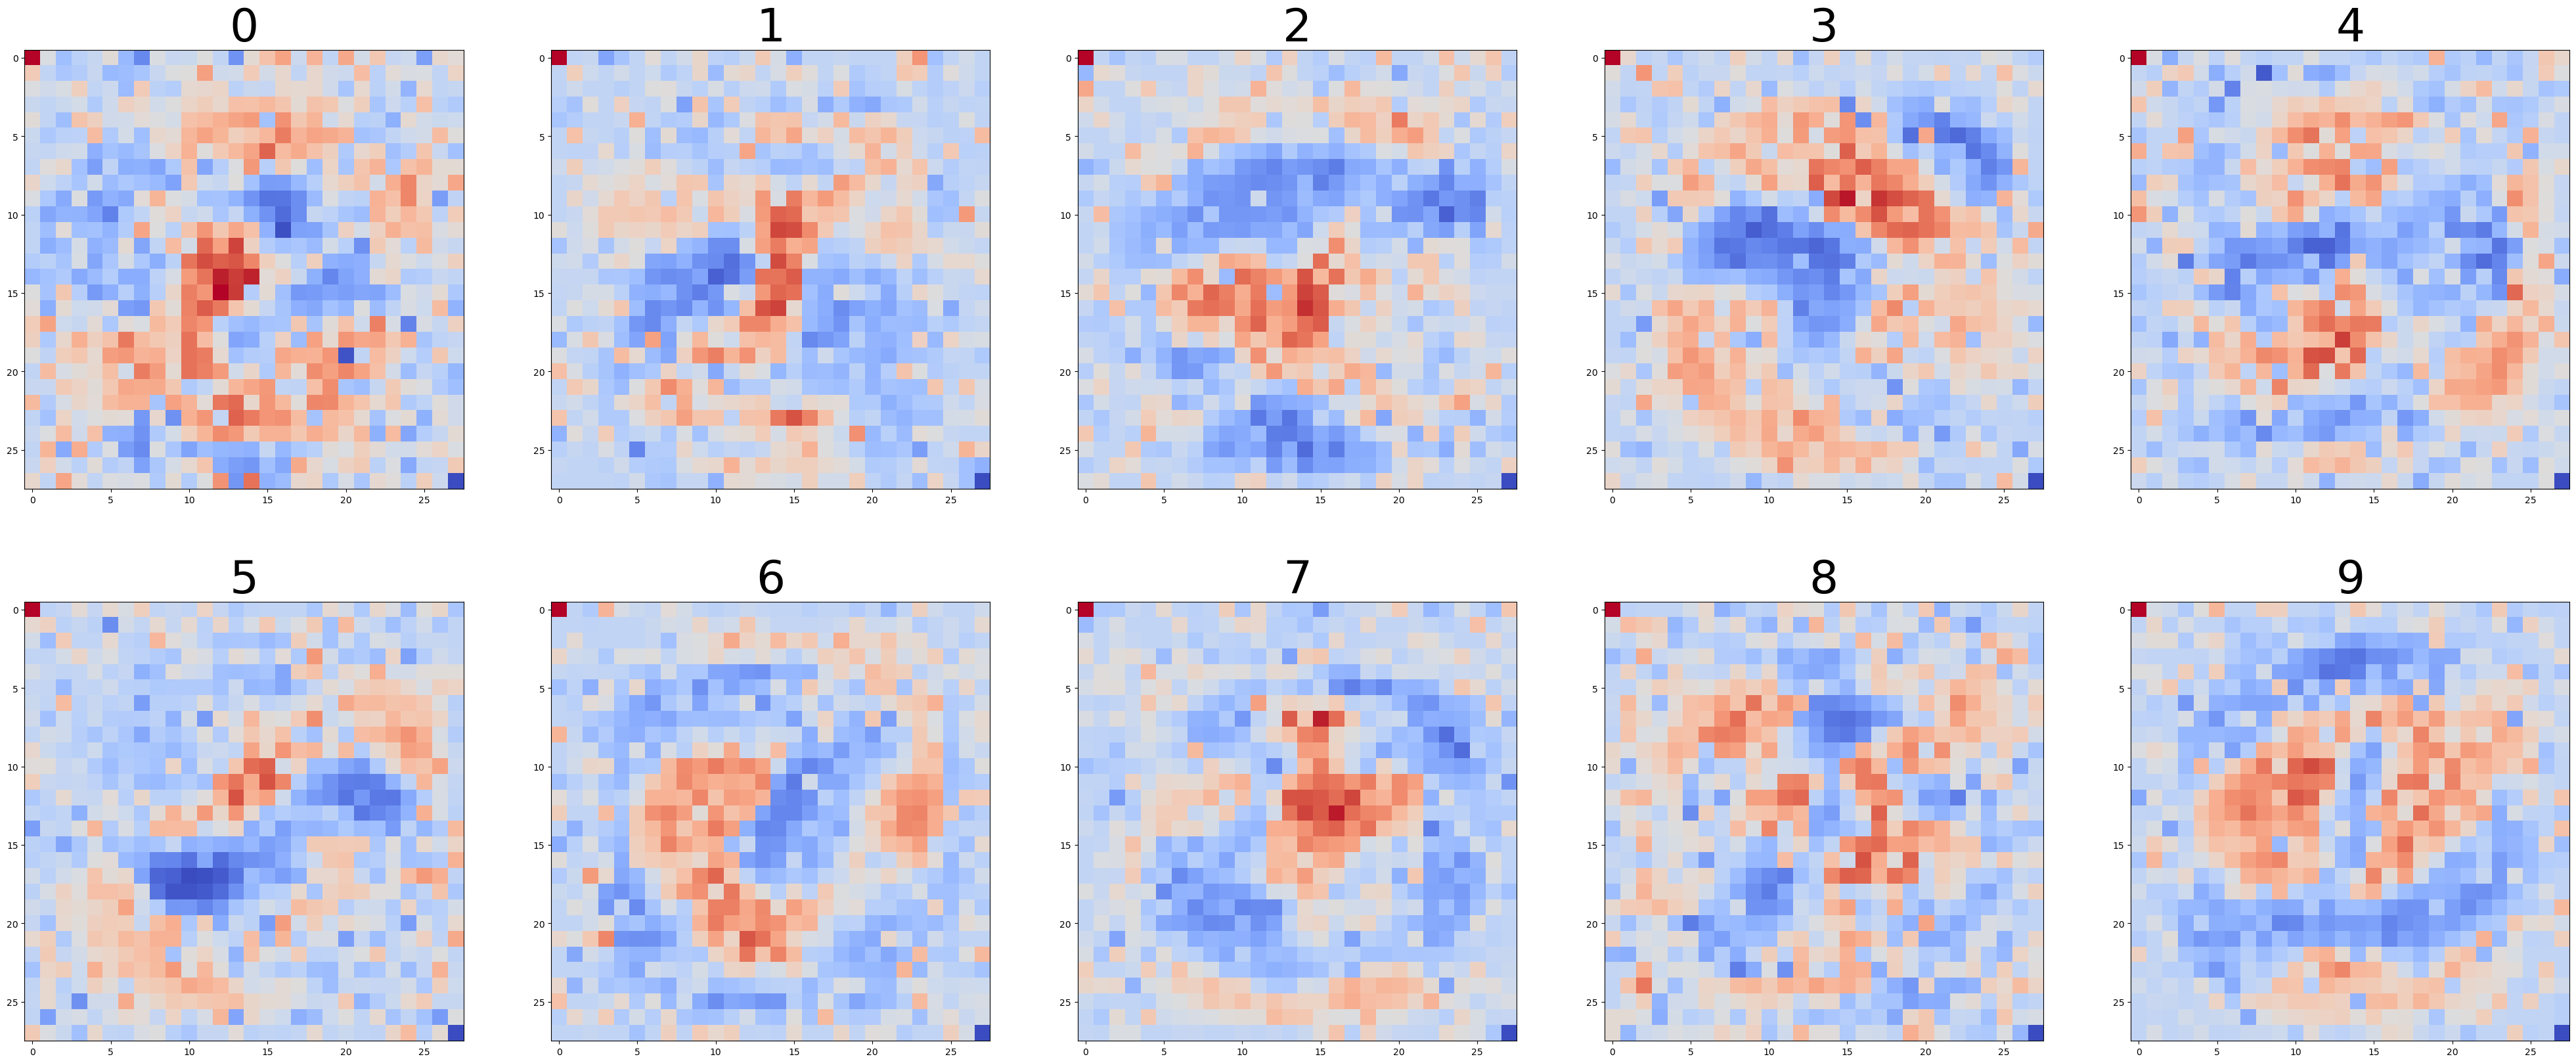

In [156]:
h = model.rbf_layers[0].centres.reshape(10, 28, 28).detach().numpy()
# b = model.b.detach().numpy()
fig, axes = plt.subplots(2, 5, figsize=(50, 20))

img = h

for i in range(2):
    for j in range(5):
        img[i*5+j, 0, 0] = np.max(img)
        img[i*5+j, 27, 27] = np.min(img)
        axes[i,j].imshow(np.tanh(img[i*5+j]/5), cmap='coolwarm')
        axes[i,j].set_title(str(i*5+j),{'fontsize':50})



惩罚函数失效，因为norm鼓励扩大差异

[-0.00312919  0.23955037  0.29504877 -0.37979805  0.21228889 -0.04393292
 -0.3283725   0.24022235  0.22049528 -0.00240025]


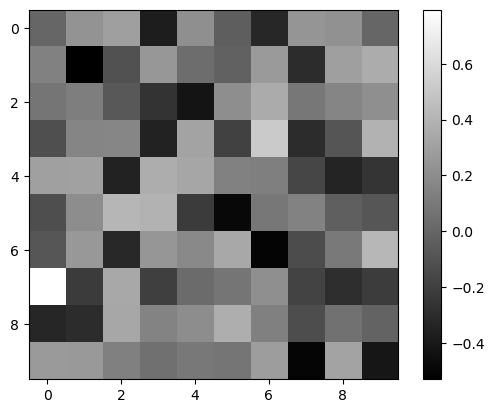

In [157]:
w = model.linear_layers[0].weight.detach().numpy()
# w[np.abs(w)<1e-2]=0
plt.imshow(w, cmap='gray')
plt.colorbar()
print(w[0])